<a href="https://colab.research.google.com/github/faturbg/data/blob/main/survey%20livingcost%20mhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# Menampilkan data untuk memeriksa formatnya
df.head()

,RESPONDEN,KOTA,UNIVERSITAS/INSTITUSI,RATA RATA BIAYA TINGGAL,RATA RATA BIAYA MAKAN,RATA RATA BIAYA TRANSPORT,PENUNJANG PERKULIAHAN,BIAYA KESEHATAN,HIBURAN,RATA RATA PENGHASILAN TAMBAHAN,TOTAL LIVINGCOST
0,1,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,725000,1300000,225000,475000,425000,750000,1500000,3900000
1,2,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,750000,475000,750000,425000,0,3480000
2,3,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,75000,437500,75000,225000,750000,1892500
3,4,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,975000,2080000,75000,437500,225000,750000,0,4542500
4,5,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,200000,780000,425000,412500,750000,425000,750000,2992500


In [51]:
# Memeriksa data yang hilang
df.isnull().sum()

# Mengisi data yang hilang dengan nilai rata-rata kolom, hanya untuk kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns  # Seleksi kolom numerik
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [53]:
from sklearn.preprocessing import StandardScaler

# Menstandarisasi data
scaler = StandardScaler()
# Check the actual column names in your DataFrame using df.columns
print(df.columns)
# Adjust the features list to match the actual column names in your DataFrame and ONLY include numerical features
features = ['RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN','RATA RATA BIAYA TRANSPORT','PENUNJANG PERKULIAHAN','BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST']
df_scaled = scaler.fit_transform(df[features])

# Menampilkan data yang sudah diskalakan
df_scaled[:5]
# Melakukan clustering dengan K-Means sebelum mencoba mengakses kolom 'Cluster'
kmeans = KMeans(n_clusters=3, random_state=42) # Inisialisasi model KMeans
df['Cluster'] = kmeans.fit_predict(df_scaled) # Sesuaikan df_scaled dengan data yang sudah diskalakan

# Print the columns of your DataFrame to see the actual names
print(df.columns)

# Access the 'Kota' and 'Cluster' columns
df[['KOTA', 'TOTAL LIVINGCOST', 'Cluster']] # Sekarang kolom 'Cluster' sudah ada di DataFrame

Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST', 'Cluster',
       'Total Living Cost'],
      dtype='object')
Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST', 'Cluster',
       'Total Living Cost'],
      dtype='object')


,KOTA,TOTAL LIVINGCOST,Cluster
0,BALIKPAPAN,3900000,1
1,BALIKPAPAN,3480000,1
2,BALIKPAPAN,1892500,0
3,BALIKPAPAN,4542500,1
4,BALIKPAPAN,2992500,1
...,...,...,...
755,YOGYAKARTA,1830000,2
756,YOGYAKARTA,2562500,0
757,YOGYAKARTA,1652500,2
758,YOGYAKARTA,3105000,0


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# ... (Kode untuk preprocessing data dan clustering sama seperti sebelumnya) ...

# Menstandarisasi data
features = ['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
           'RATA RATA PENGHASILAN TAMBAHAN']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Menghitung total biaya hidup (Total Living Cost)
df['Total Living Cost'] = df[['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN']].sum(axis=1)

# Membuat tabel cluster dengan Total Living Cost
cluster_table = df[['KOTA', 'Cluster', 'Total Living Cost']].sort_values(by=['Cluster', 'Total Living Cost'])

# Menentukan kategori cluster berdasarkan Total Living Cost dan mengubahnya menjadi 1, 2, 3
def cluster_category(total_cost):
    if total_cost <= 2000000:
        return 1  # Rendah
    elif total_cost <= 3000000:
        return 2  # Sedang
    else:
        return 3  # Tinggi

cluster_table['Kategori'] = cluster_table['Total Living Cost'].apply(cluster_category)

# Mengganti nilai cluster dengan nilai kategori (1, 2, 3)
cluster_table['Cluster'] = cluster_table['Kategori']
cluster_table = cluster_table.drop(columns=['Kategori']) # Menghapus kolom 'Kategori' jika tidak dibutuhkan

# Menampilkan tabel cluster
# Instead of df[['cluster_table']], display the cluster_table DataFrame directly
display(cluster_table)

,KOTA,Cluster,Total Living Cost
568,SEMARANG,2,2052500
159,BANJARMASIN,2,2090000
623,SEMARANG,2,2090000
32,BALIKPAPAN,2,2183750
54,BALIKPAPAN,2,2205000
...,...,...,...
758,YOGYAKARTA,3,3105000
471,SAMARINDA,3,3450000
110,BANDUNG,3,3855000
52,BALIKPAPAN,3,4042500


from matplotlib import pyplot as plt
cluster_table['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Total Living Cost'].plot(kind='hist', bins=20, title='Total Living Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table.plot(kind='scatter', x='Cluster', y='Total Living Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Total Living Cost'].plot(kind='line', figsize=(8, 4), title='Total Living Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

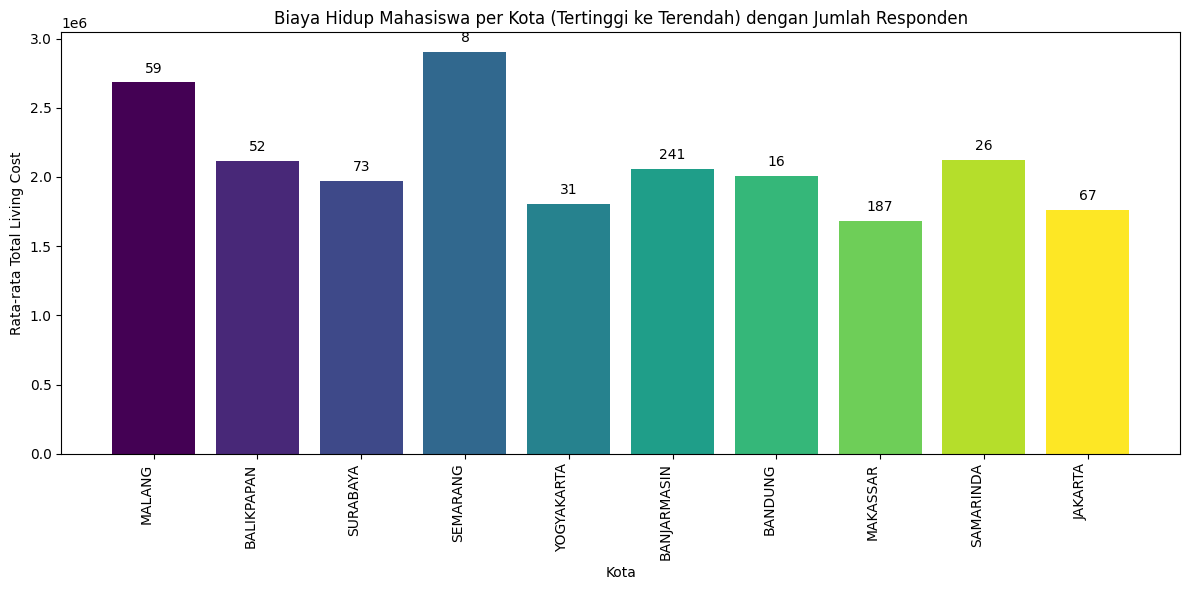

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'
df = pd.read_excel(file_path)

# Menghitung total biaya hidup (Total Living Cost)
df['Total Living Cost'] = df[['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN']].sum(axis=1)

# Mengurutkan data berdasarkan Total Living Cost (Descending)
df_sorted = df.sort_values(by=['Total Living Cost'], ascending=False)

# Menghitung jumlah responden per kota
responden_per_kota = df_sorted['KOTA'].value_counts().sort_index()

# Membuat warna dinamis berdasarkan Total Living Cost
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted['KOTA'].unique())))

# Membuat grafik bar
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_sorted['KOTA'].unique(), df_sorted.groupby('KOTA')['Total Living Cost'].mean(), color=colors)

# Menambahkan label jumlah responden di atas setiap bar
for bar, count in zip(bars, responden_per_kota):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50000, count, ha='center', va='bottom')


ax.set_xlabel('Kota')
ax.set_ylabel('Rata-rata Total Living Cost')
ax.set_title('Biaya Hidup Mahasiswa per Kota (Tertinggi ke Terendah) dengan Jumlah Responden')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()